Digital Signal Processing Courseware: An Introduction (copyright © 2024)
## Authors: J. Christopher Edgar and Gregory A. Miller

Originally written in Mathematica by J. Christopher Edgar. Conversion to Jupyter Notebook by Song Liu.

The authors of this courseware are indebted to Prof. Bruce Carpenter (University of Illinois Urbana-Champaign). Bruce inspired the creation of this courseware, he consulted with the authors as this courseware was being developed, and he provided the original version of the code and text for several sections of this courseware (e.g. the section on complex numbers and the section on normal distributions). 


# <font color=red>DSP.01 Frequency, Amplitude, and Phase</font>

# <font color=red>Give it a Try!</font>
# <font color=red>Part 1</font>

### Setup

In [1]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img
from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy.fft import fft, fftfreq
from sympy import Symbol, sin, series
from sympy import roots, solve_poly_system
import scipy.special
import matplotlib.patches as patches
import math
import cmath
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Figure size 
plt.rc("figure", figsize=(8, 6))

#function to create time course figure
#one waveform
def make_plot_1(x1,y1,type="b"): 
    plt.plot(x1, y1,type)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#two overlaid waveforms with red and blue   
def make_plot_2(x1,y1,type1,x2,y2,type2): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#three overlaid waveforms with red, blue and green   
def make_plot_3(x1,y1,type1,x2,y2,type2,x3,y3,type3): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.plot(x3, y3, type3)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
def make_plot_3d(ax,x,y,z):    
    ax.contour3D(x, y, z, 50, cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
def make_plot_freq_1(x1,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf = fft(x1)
    xf = fftfreq(N, 1 / sample_rate)
    yf = yf[0:Nhalf]
    xf = xf[0:Nhalf]
    plt.plot(xf, np.abs(yf))
    
#two spectrums
def make_plot_freq_2(x1,x2,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf1 = fft(x1)
    yf2 = fft(x2)
    xf = fftfreq(N, 1 / sample_rate)

    yf1 = yf1[0:Nhalf]
    yf2 = yf2[0:Nhalf]
    xf = xf[0:Nhalf]

    plt.plot(xf, np.abs(yf1))
    plt.plot(xf, np.abs(yf2), color = 'r')
    
def make_imshow(x):
    plt.imshow(x,cmap='Greys_r')
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def make_imshow_color(x):
    plt.imshow(x)
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def round_complex(x):
    return complex(np.round(x.real,4),np.round(x.imag,4))


Congrats - you finished the Lesson 1 Basic and Tutorial notebooks, and you're starting the Lesson 1 Give it a Try notebooks. That means we're going to do less hand-holding. Besides checking what you know from the Basics and Tutorial, will ask you to extend what you know to things we haven't covered already. This can sometimes mean providing a quick answer to a question, or sometimes copying a line of code from a previous cell and doing a small edit, such as changing the value of the 'freq' frequency variable, or adding a gain multiplier, or adding an extra label to a plot. Our interest isn't in whether you "pass the quiz" but in getting you to think about how to apply extent something you learned in the Basics and Tutorial notebooks.

## <font color=red>DSP.01.G1) Stationary Timeseries</font>

First, a new term: "stationary". A sine wave is said to be stationary when its frequency, amplitude, and phase don't change, beyond the inherent oscillation in its amplitude and phase. Imagine for a moment what a sine wave would look like if we suddenly changed its amplitude, or its phase. Across the epoch of data, it would no longer be just a simple, continuous sine wave. For now, just note that what we've been talking about are "stationary timeseries". Of course, most real-world signals change over time, beyond just sinusoidal oscillations. There are interesting implications of that, which we'll get to in a later lesson.

### <font color=red>DSP.01.G1.a) Stationary Timeseries</font>

Here is a simple timeseries.

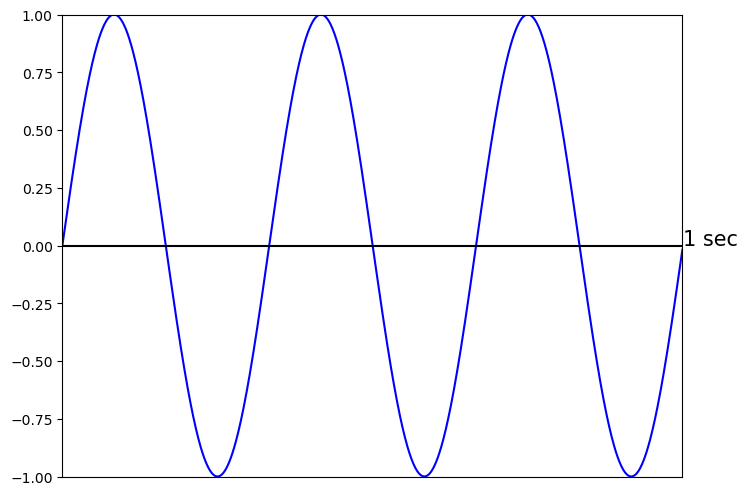

In [2]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 3
timeseries = np.sin(2*np.pi * freq * time) # sin(2𝜋 * 3 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Look at the plot and fill in the blank:      **Double click on this cell to write in your answer**

The graph above shows the plot of a ..... Hz sine wave. (type answer in blank)

Here is another simple timeseries.

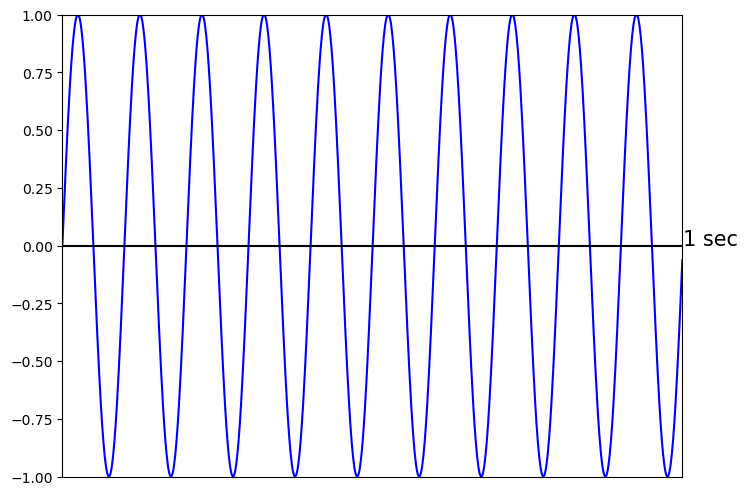

In [3]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 10
timeseries = np.sin(2*np.pi * freq * time) # sin(2𝜋 * 10 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Look at the plot and fill in the blank:      **Double click on this cell to write in your answer**
    
The graph above shows the plot of a ..... Hz sine wave. (type answer in blank)

### <font color=red>DSP.01.G1.b) Stationary Timeseries</font>

Here is some code to create a sine wave timeseries.

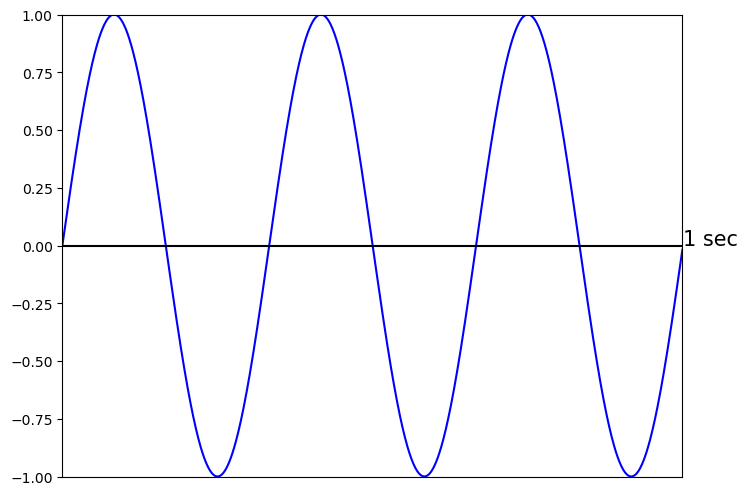

In [4]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 3
timeseries = np.sin(2*np.pi * freq * time) # sin(2𝜋 * 3 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Modify the code to plot a 15 Hz timeseries.

### <font color=red>DSP.01.G1.c) Stationary Timeseries</font>

Here is some Python code to create a sine wave timeseries.

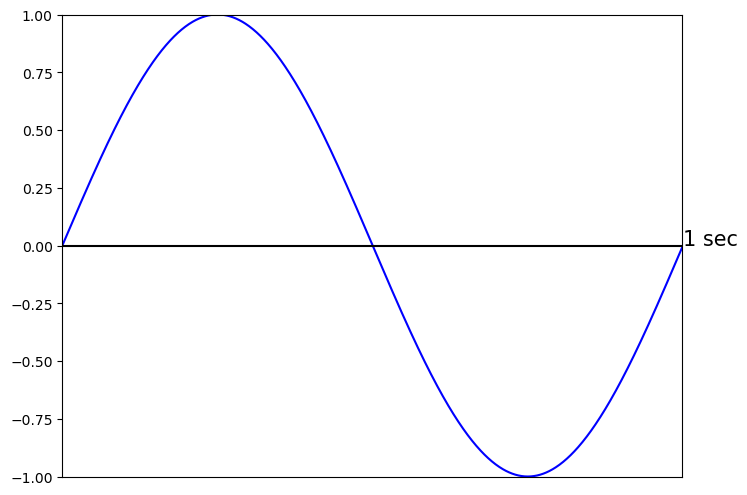

In [5]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 1
timeseries = np.sin(2*np.pi * freq * time) # sin(2𝜋 * 1 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Modify the code to plot a 25 Hz timeseries.

### <font color=red>DSP.01.G1.d) Stationary Timeseries</font>

Here is some code to create a 25 Hz sine wave timeseries.

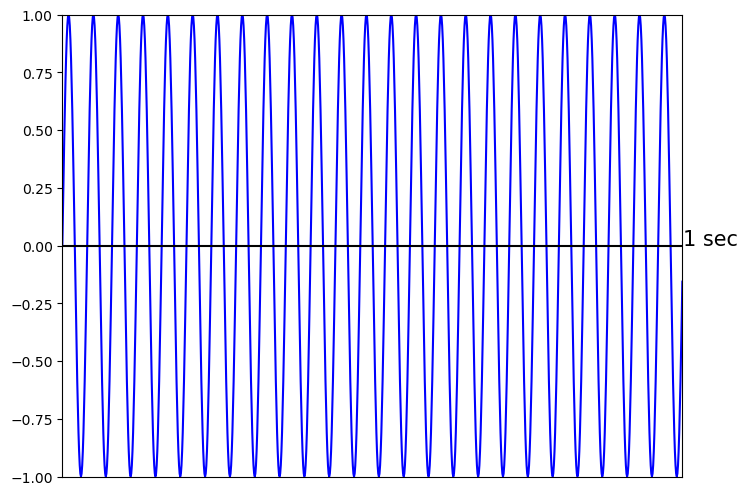

In [6]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 25
timeseries = np.sin(2*np.pi * freq * time) # sin(2𝜋 * 25 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Modify the code to plot a 25 Hz timeseries with an amplitude of 5. Remember that for now we're using "amplitude" to refer to the difference from the midpoint (zero amplitude) of the sine wave to its positive peak. So, a sine wave with an amplitude of 5 would vary from -5 to +5. Does yours, after you edit the code?

### <font color=red>DSP.01.G1.e) Stationary Timeseries</font>

Here is some Python code to create a 60 Hz sine wave timeseries.

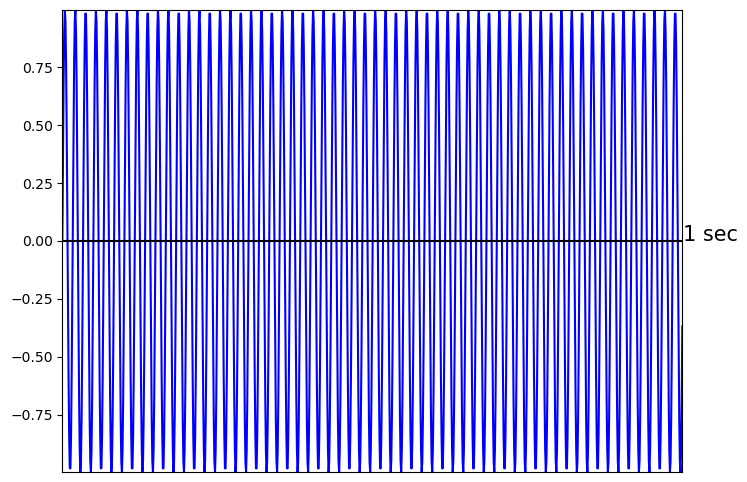

In [7]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 60
timeseries = np.sin(2*np.pi * freq * time) # sin(2𝜋 * 60 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)

plt.show()

In many countries, 50 Hz or 60 Hz is the frequency of the AC (alternating current) voltage available at wall sockets that powers equipment, and that frequency often appears in signals we record. So this is an important frequency to recognize and sometimes to filter out (which we'll talk about later). Modify the code to plot a 60 Hz timeseries with an amplitude of 10.

### <font color=red>DSP.01.G1.f) Stationary Timeseries</font>

Here is some Python code to create a 10 Hz sine wave timeseries.

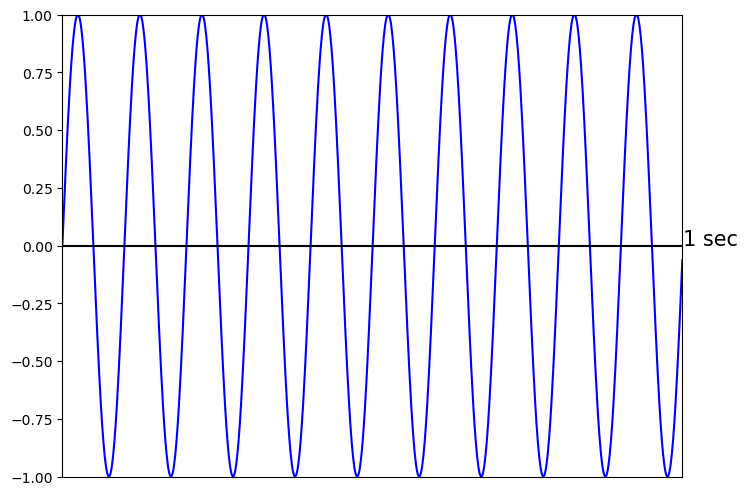

In [8]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 10
timeseries = np.sin(2*np.pi * freq * time) # sin(2𝜋 * 10 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Modify the code to plot a 35 Hz timeseries with an amplitude of 15.

### <font color=red>DSP.01.G1.g) Stationary Timeseries - Period</font>  

Some of the digital signal processing methods we'll talk about later assume that your data consists of a combination of sine waves that don't change across the interval you're analyzing. (That assumption often isn't true, but don't worry about that now.) The shortest interval for which the sine function exactly repeats itself is called the period.

Plot a 7 Hz timeseries that is completed in 1 second. Calculate the period in milliseconds and create a plot with a symbol showing the first complete period of the 7 Hz sine wave. 

**To solve this problem, copy and paste below this cell the relevant code from the Lesson 1 Basics section, then edit the code to show your answer.**

### <font color=red>DSP.01.G1.h) Stationary Timeseries - Period</font>

A 7 Hz time series has 7 cycles per second, but it can have any number of cycles total, depending on
how many seconds the time series lasts for. (In fact, the basic concept of a sine wave has it continuing infinitely, both
ahead in time and backwards in time. But we don't have to go there...) Now plot a 7 Hz timeseries over
a 2 second interval. Calculate the period in milliseconds and create a plot with a symbol showing the
first complete period of the 7 Hz sine wave.

**To solve this problem, copy and paste below this cell the relevant code from the Lesson 1 Basics section, then edit the code to show your answer.**

### <font color=red>DSP.01.G1.i) Stationary Timeseries</font>

Now plot a 2 Hz timeseries that lasts 1.5 seconds.

**To solve this problem, copy and paste below this cell the relevant code from the Lesson 1 Basics section, then edit the code to show your answer.**

### <font color=red>DSP.01.G1.j) Stationary Timeseries - Gain</font>

In common use, the term 'gain' indicates an increase in magnitude.
                         
Here is a 5 Hz sine wave.

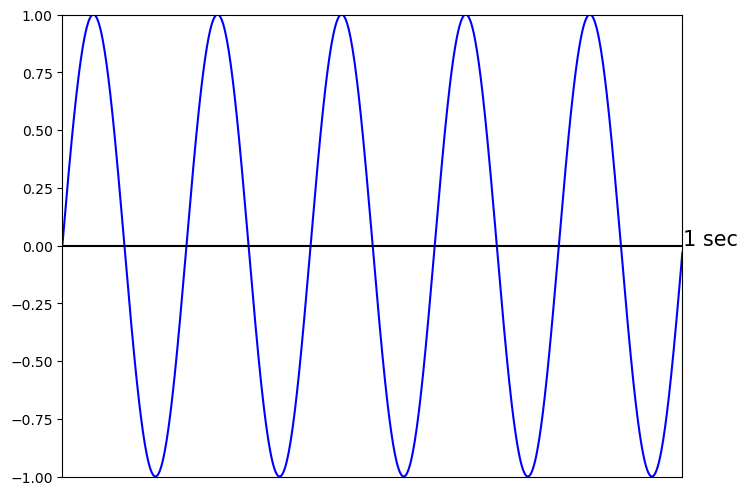

In [9]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 5
timeseries = np.sin(2*np.pi * freq * time) # sin(2𝜋 * 5 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Create a 5 Hz timeseries with a sixfold increase in gain. Overlay the original and the amplified plot and comment on what you see.

**To solve this problem, copy and paste below this cell the relevant code from the Lesson 1 Basics section, then edit the code to show your answer.**

### <font color=red>DSP.01.G1.k) Stationary Timeseries - Gain</font>

Here is a 5 Hz sine wave of amplitude = 8 units.

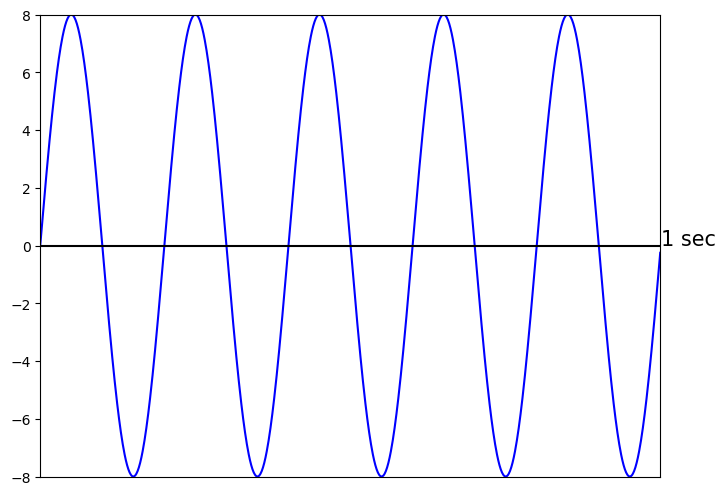

In [10]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 5
gain = 8
timeseries = gain * np.sin(2*np.pi * freq * time) # 8 * sin(2𝜋 * 5 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

To be precise, 'gain' is a ratio describing the effect of a signal-processing step on the amplitude of a signal: the ratio of the output amplitude divided by the input amplitude. If the ratio is a positive value, but less than 1.0, the effect is to decrease the signal. So, in everyday usage 'gain' is a ratio larger than 1.0 (the output is larger than the input), 'gain' can also refer to a decrease in magnitude. ('gain' can even be less than 0.0, but we won't deal with that here.) 

Create a 5 Hz timeseries with a 1/4 gain decrease (that is, create a new timeseries that is three-fourths
of the original). Overlay the original and the modified plot and comment on what you see.

**To solve this problem, copy and paste below this cell the relevant code from the Lesson 1 Basics section, then edit the code to show your answer.**

**Double click on this cell to write your observations.**

### <font color=red>DSP.01.G1.l) Stationary Timeseries - Phase</font>

Most of the timeseries we have been looking at start at 0 (time t0) and continue for however long we
decide, changing moment to moment. But at any given moment one can ask what the phase is. That is,
at what point in its cycle is it?

Here is a sine wave plotted with a dot at a particular point.

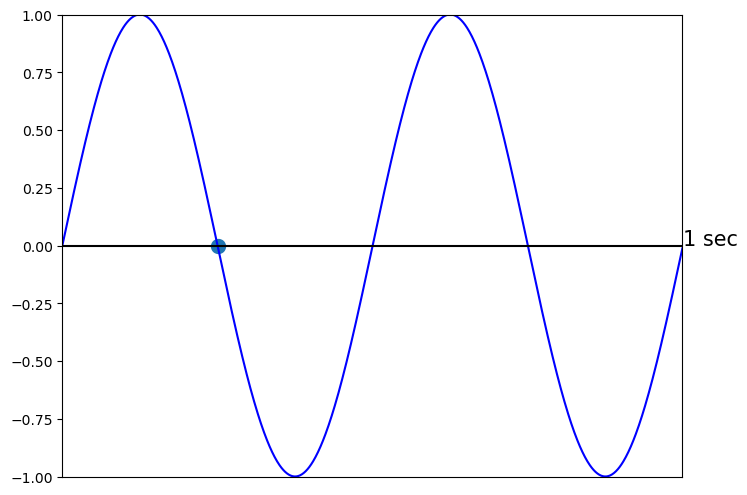

In [11]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 2
timeseries = np.sin(2*np.pi * freq * time) # sin(2𝜋 * 2 * time)

make_plot_1(time,timeseries)

plt.text(1,0,'1 sec',fontsize=15)
plt.scatter(0.25,0,linewidth=5)

plt.show()

Without doing any calculations, the phase at the dot is ..... radians. (type answer in blank) 

**Double click on this cell to write in your answer**

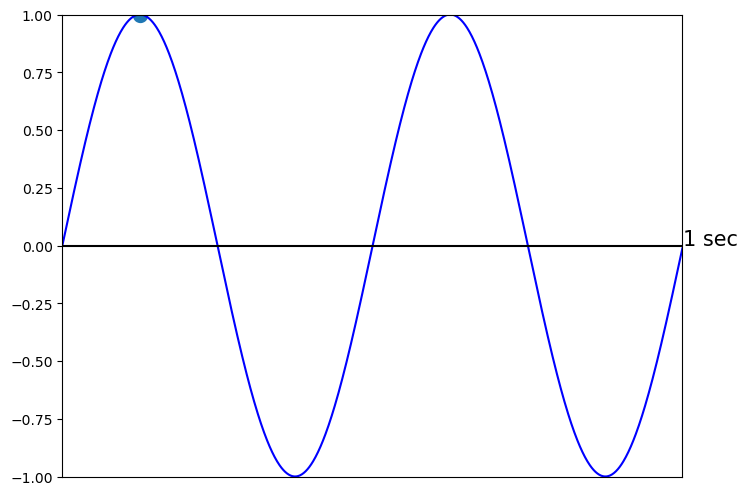

In [12]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 2
timeseries = np.sin(2*np.pi * freq * time) # sin(2𝜋 * 2 * time)

make_plot_1(time,timeseries)

plt.text(1,0,'1 sec',fontsize=15)
plt.scatter(0.125,1,linewidth=5)

plt.show()

Without doing any calculations, the phase at the dot is ..... radians. (type in answer here)

 **Double click on this cell to write in your answer**

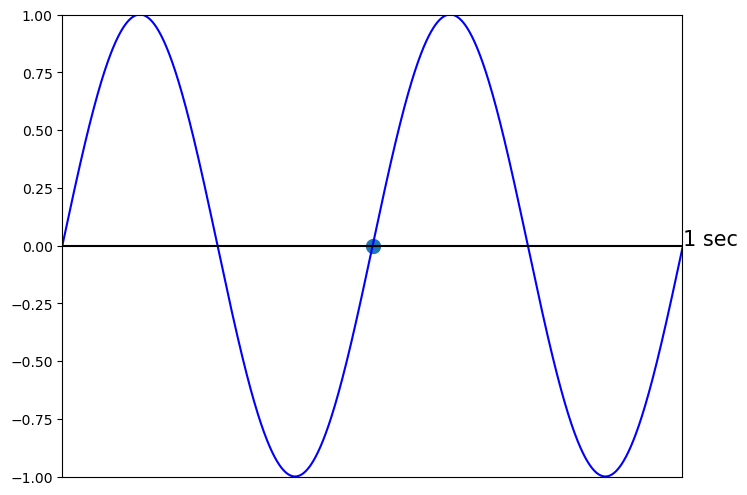

In [13]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 2
timeseries = np.sin(2*np.pi * freq * time) # sin(2𝜋 * 2 * time)

make_plot_1(time,timeseries)

plt.text(1,0,'1 sec',fontsize=15)
plt.scatter(0.5,0,linewidth=5)

plt.show()

Without doing any calculations, the phase at the dot is ..... radians. (type answer in blank)

 **Double click on this cell to write in your answer**

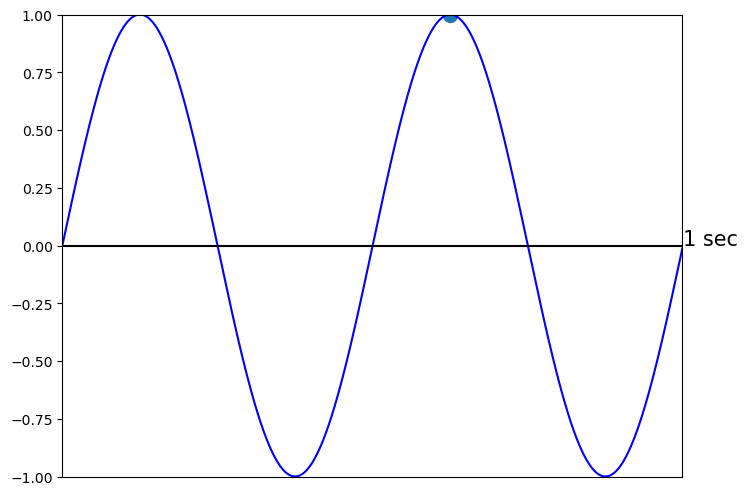

In [14]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 2
timeseries = np.sin(2*np.pi * freq * time) # sin(2𝜋 * 2 * time)

make_plot_1(time,timeseries)

plt.text(1,0,'1 sec',fontsize=15)
plt.scatter(0.625,1,linewidth=5)

plt.show()

Without doing any calculations, the phase at the dot is ..... radians. (type in answer here)

 **Double click on this cell to write in your answer**

Looking at the code in the last few code cells, you can see that they differed only in the first argument in the 'plt.scatter' function call, for example the 0.625 in 'plt.scatter(0.625,1,linewidth=5)'. By checking how that argument differed in the last few plots, can you see why the dot was plotted where it was each time?

### <font color=red>DSP.01.G1.m) Stationary Timeseries - Phase</font>

There are two common conventions for quantifying the phase of a sine wave: degrees and radians.
Degrees and radians are always interchangeable. One complete cycle of a sine wave can be characterized
as taking 360 degrees or as taking 2π radians. At the beginning of a cycle (where the amplitude is 0.0, and the sine wave is going positive), the sine wave is said to
be at 0 degrees or at 0 radians. Halfway through a cycle, a sine wave is at 180 degrees or at π radians.
After one full cycle, it is at 360 degrees or at 2π radians, which (because we're going around a circle, just writing out our position on the circle as it changes over time, in order to create the sine wave) is the same as 0 degrees or 0 radians.

Here is a 9 Hz timeseries.

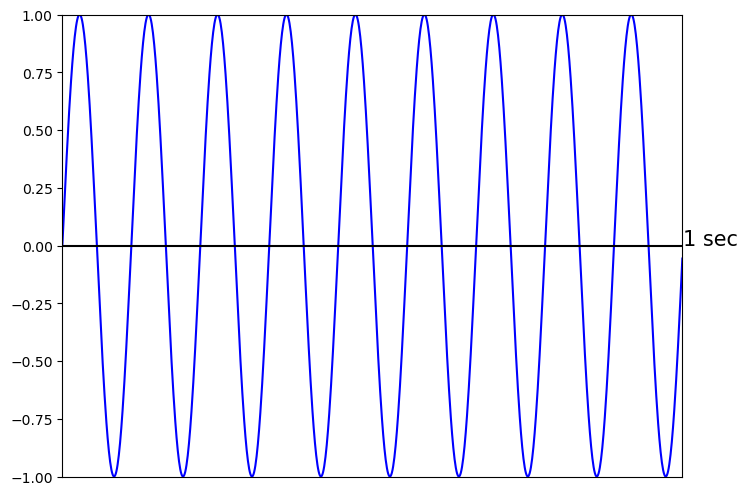

In [15]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 9
timeseries = np.sin(2*np.pi * freq * time) # sin(2𝜋 * 9 * time)

make_plot_1(time,timeseries)

plt.text(1,0,'1 sec',fontsize=15)

plt.show()

Shift the timeseries 90 degrees.

### <font color=red>DSP.01.G1.n) Stationary Timeseries - Phase</font>

Here is a 5 Hz timeseries.

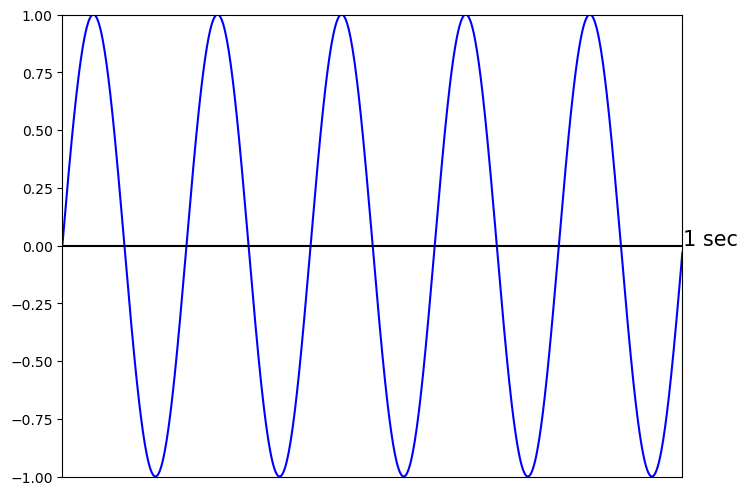

In [16]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 5
timeseries = np.sin(2*np.pi * freq * time) # sin(2𝜋 * 5 * time)

make_plot_1(time,timeseries)

plt.text(1,0,'1 sec',fontsize=15)

plt.show()

Shift the above timeseries 124 degrees.